# Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
Science/master/titanic-train.csv

titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E
mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.

In [45]:
# import all supported library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [46]:
Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url)

In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [49]:
titanic = titanic.drop('Cabin',axis=1)

In [50]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [51]:
titanic.Age.isnull().sum()

0

In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [53]:
titanic = titanic.drop('Name',axis=1)

In [54]:
titanic = titanic.drop('PassengerId',axis=1)

In [55]:
#Embarked column contains 2 null values .This can be removed without much affecting the model algorithm
titanic.dropna(inplace=True)

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


# DATA ANALYSIS THROUGH VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE9104A668>,
      dtype=object)

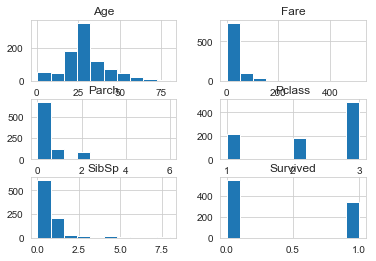

In [57]:
titanic.hist()

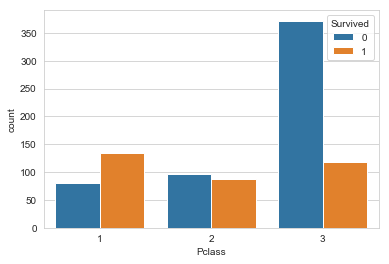

In [58]:
sb.countplot(x='Pclass',data=titanic,hue='Survived')

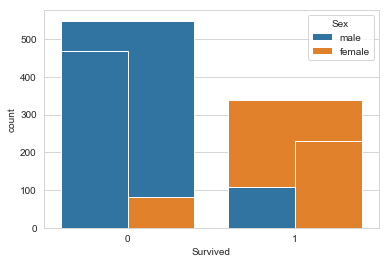

In [59]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=titanic)
sb.countplot(x='Survived',data=titanic,hue='Sex')

In [60]:
#Converting  Categorical Values into Numeric Values
titanic.Sex = titanic.Sex.map({'female':0,'male':1})
titanic.Sex.unique()

array([1, 0], dtype=int64)

In [61]:
#using LabelEncoder fit and transform method to convert categorical values to numerical values

from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
lable_encoder.fit(titanic.Embarked)


LabelEncoder()

In [62]:
titanic.Embarked = lable_encoder.transform(titanic.Embarked)

In [63]:
titanic.Embarked.nunique()

3

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
scaler.fit(pd.DataFrame(titanic['Fare']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
titanic.Fare =scaler.transform(pd.DataFrame(titanic['Fare']))

In [67]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,-0.500240,2
1,1,1,0,38.0,1,0,PC 17599,0.788947,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,-0.486650,2
3,1,1,0,35.0,1,0,113803,0.422861,2
4,0,3,1,35.0,0,0,373450,-0.484133,2


In [68]:
#Removed Survived from features as it is the label to be processed
#Removed PassengerId ,Name columns as it has not much significance.
X = titanic.drop(['Ticket'],axis=1)
Y = titanic.Survived

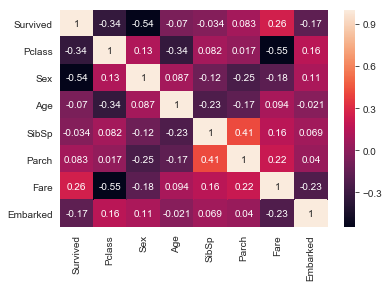

In [69]:
sb.heatmap(X.corr(),annot=True)

In [70]:
#create correlation matrix with absolute values
df_corr = X.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))

#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

#Print Correlated features
print(corr_features)

[]


As evident from above no high correlation eists between these features

# SPLIT TRAIN TEST Split the dataset

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=100)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (622, 8)
X_test Shape :  (267, 8)
Y_train Shape :  (622,)
Y_test.shape :  (267,)


# CLASSIFICATION USING Decision REGRESSION

In [72]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()


In [73]:
f_fold =KFold(n_splits=3,shuffle=True,random_state=330)

In [74]:
fold_accuracy = []
for train_kf ,test_kf in f_fold.split(X):   
    Train_X ,test_X =X.iloc[train_kf] ,X.iloc[test_kf]
    Train_Y,test_Y = Y.iloc[train_kf], Y.iloc[test_kf]
    Value = tree_model.fit(Train_X,Train_Y)
    haea =Value.score(X=test_X,y=test_Y)
    fold_accuracy.append(haea)

fold_accuracy

[1.0, 1.0, 1.0]

In [75]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
tree_model.score(X_test,Y_test)

1.0

# Stratified K-Folds cross-validator
Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [77]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
s_fold_accuracy = []
for train_fold, valid_fold in skfold.split(X,Y):
    train = X.iloc[train_fold] # Extract train data with cv indices
    valid = X.iloc[valid_fold] # Extract valid data with cv indices
    
    train_y = Y.iloc[train_fold]
    valid_y = Y.iloc[valid_fold]
    
    model = tree_model.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    s_fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", s_fold_accuracy, "\n")
print("Average accuracy: ", sum(s_fold_accuracy)/len(s_fold_accuracy))

Accuracy per fold:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

Average accuracy:  1.0


# Cross Validation Score for Decision Regression

In [78]:
from sklearn.model_selection import cross_val_score
model_result = {}
scores = cross_val_score(tree_model,     # Model to test
                X= X,  
                y = Y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_result['Logistic Regression CV Score'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average accuracy:  1.0


C:\Users\312006926\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


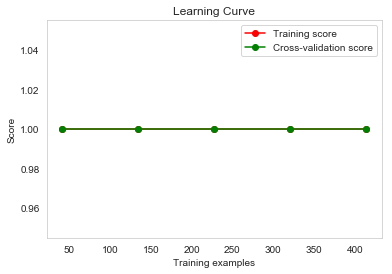

In [86]:
import scikitplot
scikitplot.estimators.plot_learning_curve(tree_model,X_train,Y_train)

In [87]:
Y_pred = tree_model.predict(X_test)

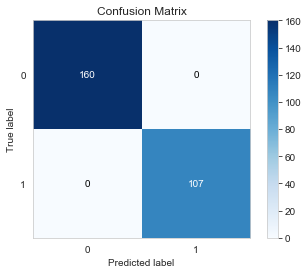

In [88]:
scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred)

In [89]:
Y_pred_proba = tree_model.predict_proba(X_test)

C:\Users\312006926\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


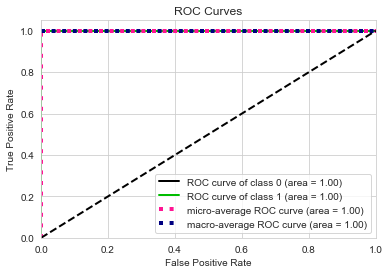

In [90]:
scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_proba)

# CLASSIFICATION USING DECISION TREES with Depth
10 FOLD CROSS VALIDATON

In [91]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10,shuffle=True,random_state=0)
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
dt = DecisionTreeClassifier(max_depth=3)
fold_accuracy = []
for train_fold, valid_fold in kfold.split(X,Y):
    train = X.iloc[train_fold] # Extract training data with cv indices
    valid = X.iloc[valid_fold] # Extract validation data with cv indices
    
    train_y = Y.iloc[train_fold]
    valid_y = Y.iloc[valid_fold]
    
    model = dt.fit(train,train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Decision Tree Classifier Accuracy per fold: ", fold_accuracy, "\n")
print("Decision Tree Classifier Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Decision Tree Classifier Accuracy per fold:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

Decision Tree Classifier Average accuracy:  1.0
